# <html>
   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">
 
</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: Data Science </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">CA0-Introduction to Data Science</h1>
        <h1 style="font-family: Georgia; color: black; text-align: center; ">Team memebers:</h1>

</div>

   <div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Shahzad Momayez-sid:810100272 </h1>
       <h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou-sid:810100084 </h1>
       <h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Amir Mahdi Farzaneh-sid:810100194 </h1>

</div>
   

</html>











## The purpose of the assignment:
the purpose of this assignment was web scraping and conducting basic statistical analysis.

## A brief summary of what we did:
actually, in order to complete this project we had to do 3 tasks:
  - 1. Environment Setup: Install the required libraries such as Beautiful Soup, Selenium,
pandas, numpy, matplotlib, and seaborn.

  - 2. Web Scraping: Write a script to scrape transaction data from Etherscan.io. Use
Selenium to interact with the website and Beautiful Soup to parse the HTML content.

  - 3. Data Sampling and Analysis: Once the data is collected, create a sample from the
dataset. Compare the sample statistics (mean and standard deviation) with the
population statistics.

## An explanation for each dataset that is loaded in the notebook, why you’re using it, is it for training process or test, etc:
well, first of all we used web scraping in order to extract the data from the website. and we saved all data into a CSV and the showed it as a df named "df_optimized". In this project we did not need to divide the data into train and test!
we used web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective was to collect transactions from the last 10 blocks on Ethereum. To accomplish this task, we will employ web scraping
techniques to extract the transaction data from the Etherscan website.

# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

In [1]:
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import pandas as pd
import time
from bs4 import BeautifulSoup
import re
import json
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC  
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup


def scrape_data():
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(options=options)
    

    # Open Etherscan
    driver.get("https://etherscan.io/blocks")
    wait = WebDriverWait(driver, 10)
    table = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'table')))
   

    # Use BeautifulSoup to parse block numbers
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    blocks = [row.find('a').text for row in soup.find_all('tr')[1:11]]  # Get the last 10 blocks

    transactions_data = []

    # Iterate over blocks
    # extract transactions
    for block in blocks:
        driver.get(f"https://etherscan.io/txs?block={block}")
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'table-hover')))

        # iterate over pagination
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        pagination = soup.find('ul', class_='pagination')
        pages = 1
        if pagination:
            pages = len(pagination.find_all('li')) - 2  # Adjust for 'previous' and 'next' buttons

        for page in range(1, pages + 1):
            if page > 1:
                # Go directly to the page
                driver.get(f"https://etherscan.io/txs?block={block}&p={page}")
                wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'table-hover')))

            soup = BeautifulSoup(driver.page_source, 'html.parser')
            transactions_table = soup.find('table', class_='table-hover')

            # Extract transactions
            for row in transactions_table.find('tbody').find_all('tr'):
                cells = row.find_all('td')
                if len(cells) > 1:  # Ensure it's not an empty row
                    transaction = {
                        'Hash': cells[1].text.strip(),
                        'Method': cells[2].text.strip(),
                        'Block': block,
                        'Age': cells[4].text.strip(),
                        'From': cells[7].text.strip(),
                        'To': cells[9].text.strip(),
                        'Value': cells[10].text.strip(),
                        'TxnFee': cells[11].text.strip(),
                    }
                    transactions_data.append(transaction)

    driver.quit()

    # Convert the list of dictionaries into a DataFrame and save as CSV
    df = pd.DataFrame(transactions_data)
    df.to_csv('data.csv', index=False)
    return df

# Execute the function and print the first few rows of the dataframe




In [3]:
df_optimized = scrape_data()
print(df_optimized.head())

Error sending stats to Plausible: error sending request for url (https://plausible.io/api/event): error trying to connect: tls handshake eof


                                                Hash               Method  \
0  0x302c58586693558fa1cf6a69d3c9581064422fd59382...             Transfer   
1  0xcab56e2f4d7295417e76e14424c5f02f5bf278dab990...             Transfer   
2  0xc19c1886ec6c8704373e96387bb84a71ba01b8889f2f...           0x415565b0   
3  0x68c92b9ec8eee3ca49df390d47d1b890b77d6ee22f98...  Prove Withdrawal...   
4  0x769e10313cca8dd1ece1f75c0e683e97d2b942f4e9c4...  Sell Token For T...   

      Block                  Age                    From  \
0  19399877  2024-03-09 20:18:11  0x2d2e5835...8c6aE59B3   
1  19399877  2024-03-09 20:18:11  0xC651DC04...be7eD3752   
2  19399877  2024-03-09 20:18:11  0x9e8D0a76...6acf757D9   
3  19399877  2024-03-09 20:18:11  0x37FF3B13...C115f5C84   
4  19399877  2024-03-09 20:18:11  0x70b12912...8D3C5FbEC   

                       To            Value      TxnFee  
0   Chainlink: LINK Token            0 ETH  0.00334964  
1  0xCc3b9781...479e5788E  0.025665967 ETH  0.00148712  
2    

In [4]:
df_optimized.describe()

,Hash,Method,Block,Age,From,To,Value,TxnFee
count,1383,1383,1383,1383,1383,1383,1383,1383
unique,1383,124,10,10,961,703,533,974
top,0x302c58586693558fa1cf6a69d3c9581064422fd59382...,Transfer,19399877,2024-03-09 20:18:11,0xa152F8bb...ee2B3f94E,Tether: USDT Stablecoin,0 ETH,0.001617
freq,1,718,150,150,120,166,706,61


## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

- Remove irrevilant values

In [7]:
df_optimized.drop(['Method', 'Block', 'Age', 'From',	'To'], axis=1)

,Hash,Value,TxnFee
0,0x302c58586693558fa1cf6a69d3c9581064422fd59382...,0 ETH,0.00334964
1,0xcab56e2f4d7295417e76e14424c5f02f5bf278dab990...,0.025665967 ETH,0.00148712
2,0xc19c1886ec6c8704373e96387bb84a71ba01b8889f2f...,0.012832983 ETH,0.01820076
3,0x68c92b9ec8eee3ca49df390d47d1b890b77d6ee22f98...,0 ETH,0.02120596
4,0x769e10313cca8dd1ece1f75c0e683e97d2b942f4e9c4...,0 ETH,0.01630496
...,...,...,...
1378,0x419a8673f1075f6d4749f025068d836f5bf829cd6684...,0 ETH,0.01224315
1379,0x906711cef193ccaa98244f25254625ed216172778ef8...,0 ETH,0.018989
1380,0xca0b07d7e0f557a1526b6f32d7f56647d39669d06672...,0.000000038 ETH,0.02649033
1381,0xd62e68f65b5077874f32002d5c03bd81bcc97779c035...,1.8 ETH,0.00698197


- Drop duplicated

In [8]:
df_without_duplicates = df_optimized.drop_duplicates()

- Change columns' data type

In [9]:
df_without_duplicates['Value'] = df_without_duplicates['Value'].str.extract(r'(\d+\.\d+)').astype(float)
df_without_duplicates['Value'] = df_without_duplicates['Value'].replace(np.nan, 0)

In [10]:
df_without_duplicates['TxnFee'] = df_without_duplicates['TxnFee'].astype(float)

In [11]:
df_without_duplicates[:5]

,Hash,Method,Block,Age,From,To,Value,TxnFee
0,0x302c58586693558fa1cf6a69d3c9581064422fd59382...,Transfer,19399877,2024-03-09 20:18:11,0x2d2e5835...8c6aE59B3,Chainlink: LINK Token,0.000000,0.003350
1,0xcab56e2f4d7295417e76e14424c5f02f5bf278dab990...,Transfer,19399877,2024-03-09 20:18:11,0xC651DC04...be7eD3752,0xCc3b9781...479e5788E,0.025666,0.001487
2,0xc19c1886ec6c8704373e96387bb84a71ba01b8889f2f...,0x415565b0,19399877,2024-03-09 20:18:11,0x9e8D0a76...6acf757D9,0x: Exchange Proxy,0.012833,0.018201
3,0x68c92b9ec8eee3ca49df390d47d1b890b77d6ee22f98...,Prove Withdrawal...,19399877,2024-03-09 20:18:11,0x37FF3B13...C115f5C84,Base: Base Portal,0.000000,0.021206
4,0x769e10313cca8dd1ece1f75c0e683e97d2b942f4e9c4...,Sell Token For T...,19399877,2024-03-09 20:18:11,0x70b12912...8D3C5FbEC,0x: Exchange Proxy,0.000000,0.016305


In [12]:
df_Value = df_without_duplicates['Value']
df_TxnFee = df_without_duplicates['TxnFee']

- Unique values number for TxnFee and Value columns

In [13]:
print("Number of unique values in Value column : ", df_Value.nunique())

Number of unique values in Value column :  525


In [14]:
print("Number of unique values in Value column : ", df_TxnFee.nunique())

Number of unique values in Value column :  974


- Number of zeros for Value and TxnFee columns

In [15]:
print("Number of zero Value column : ", (df_Value == 0).sum())

Number of zero Value column :  721


In [16]:
print("Number of zero TxnFee column : ", (df_TxnFee == 0).sum())

Number of zero TxnFee column :  0


- Mean and Std for Value and TxnFee

In [17]:
print("Mean of Value column : ", df_Value.mean())

Mean of Value column :  0.2659878582704266


In [18]:
print("Std of Value column : ", df_Value.std())

Std of Value column :  2.8277578562339754


In [19]:
print("Mean of TxnFee column : ", df_TxnFee.mean())

Mean of TxnFee column :  0.006867825777295735


In [20]:
print("Std of TxnFee column : ", df_TxnFee.std())

Std of TxnFee column :  0.017789598926915527


-------------------------------------------------------------------------------------------------------------------------------------------------------

TxnFree has high standard deviation because <span style="color:red">high number of zero</span> values.

Value column standard deviation is low and shows indicates that the values are dense. 

-------------------------------------------------------------------------------------------------------------------------------------------------------


In [21]:
df_Value_without_zero = df_without_duplicates[df_without_duplicates['Value'] != 0 ]

In [22]:
def find_bin_size(df):
     return int(((max(df) - min(df))/(pow(len(df), -1/3) * 3.49 * (df.std())) ))

In [23]:
bin_size = find_bin_size(df_Value_without_zero['Value'])

In [24]:
bin_size

56

- Histogram

<Axes: title={'center': 'Histogram Value without zero'}, ylabel='Frequency'>

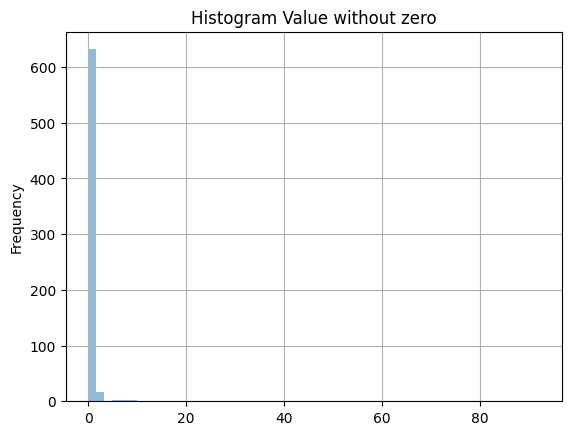

In [25]:
df_Value_without_zero['Value'].plot(kind='hist', bins=(bin_size), density=False, alpha=0.5, label='Histogram of Value', grid=True, 
                                    title = "Histogram Value without zero")

In [26]:
df2 = df_Value_without_zero[df_Value_without_zero['Value'] < 1]

In [27]:
text = "lenght deleted samples with value more than 1 : {} ".format(len(df_Value_without_zero) - len(df2))
print(text)

lenght deleted samples with value more than 1 : 48 


<Axes: title={'center': 'Histogram Value less than one and without zero'}, ylabel='Frequency'>

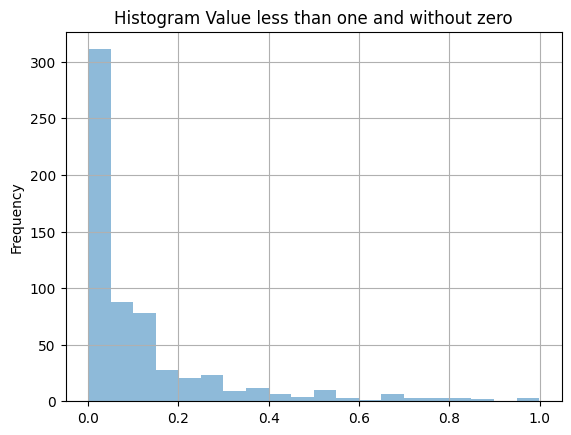

In [28]:
df2['Value'].plot(kind='hist', bins=(20), density=False, alpha=0.5, label='Histogram of Value', grid=True, title = "Histogram Value less than one and without zero")

In [29]:
df_Value_without_zero = df_without_duplicates[df_without_duplicates['Value'] != 0] 
df = df_Value_without_zero

<Axes: title={'center': 'Histogram TxnFee'}, ylabel='Frequency'>

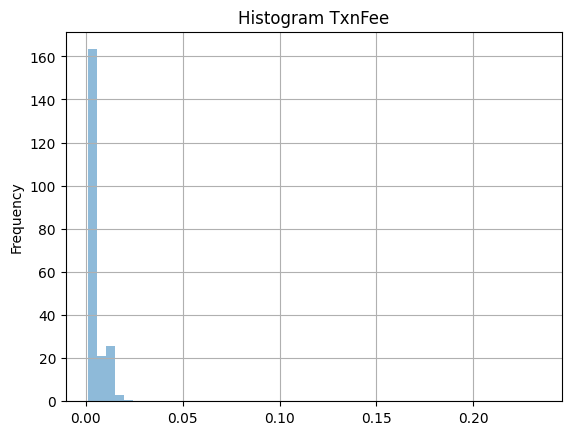

In [30]:
df['TxnFee'].plot(kind='hist', bins=(50), density=True, alpha=0.5 , label='Histogram of TxnFee', grid=True, title = "Histogram TxnFee")

- Binsize selction method









In [31]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def hist_with_normal(df, title):
    bin_size = find_bin_size(df)
    df.plot(kind='hist', bins=bin_size, density=True, alpha=0.5, label='Histogram')
    # Parameters for the normal distribution (mean and standard deviation)
    mu, sigma = df.mean(), df.std()
    
    # Create a range of x values for the curve
    avg_min_max = (df.max() + df.min())/2
    x_range = np.linspace( -df.min()-avg_min_max, df.max()+avg_min_max, 1000)
    
    # Compute the PDF of the normal distribution
    pdf_values = norm.pdf(x_range, mu, sigma)
    
    # Plot the normal distribution curve
    plt.plot(x_range, pdf_values, color='red', label='Normal Distribution')
    
    # Customize the plot
    plt.xlabel('Data Values')
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.grid()
    
    # Show the plot
    plt.show()


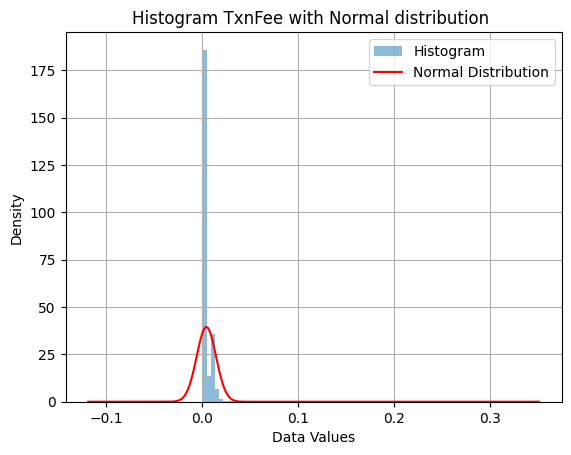

In [32]:
hist_with_normal(df_Value_without_zero['TxnFee'], "Histogram TxnFee with Normal distribution ")

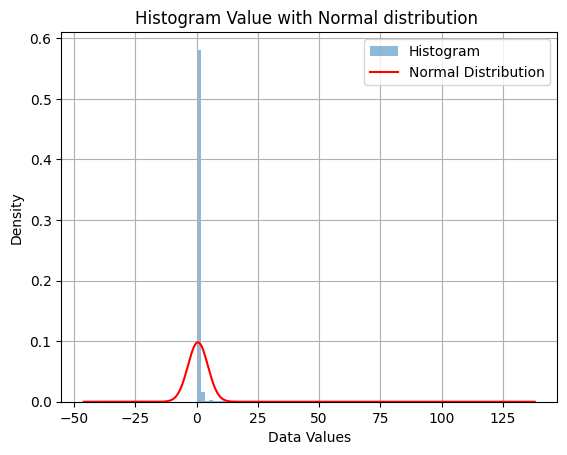

In [33]:
hist_with_normal(df_Value_without_zero['Value'], "Histogram Value with Normal distribution ")

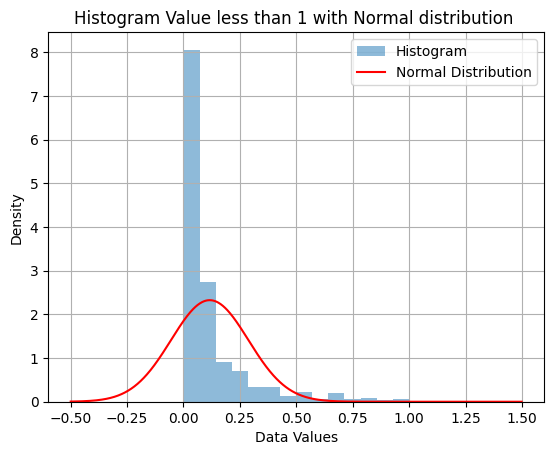

In [34]:
hist_with_normal(df2['Value'], "Histogram Value less than 1 with Normal distribution ")

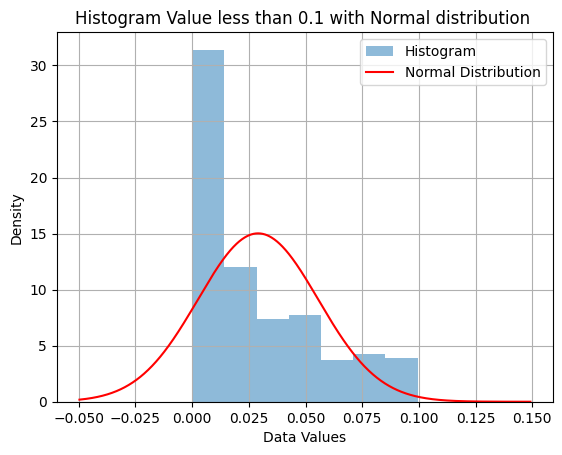

In [35]:
df3 = df2[df2['Value']  < 0.1]
hist_with_normal(df3['Value'], "Histogram Value less than 0.1 with Normal distribution ")

- Analysis

As we see in above plots , population has skew to the right . but when we extract values near zero(dense part of samples) we can see , distributionis near to gaussian distribution.

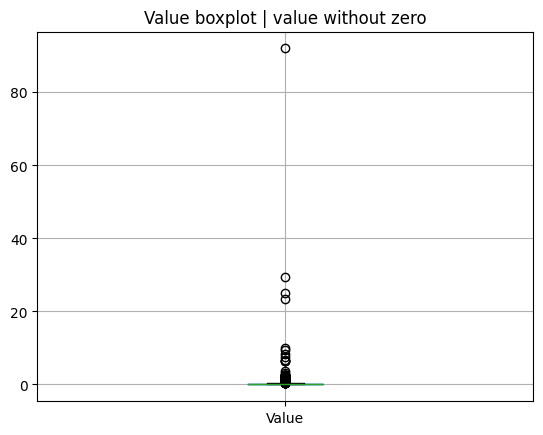

In [36]:
df_Value_without_zero.boxplot(column = 'Value')
plt.title("Value boxplot | value without zero")

# Show the plot
plt.show()

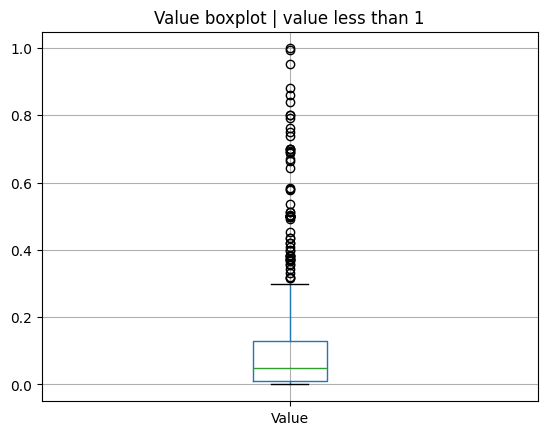

In [37]:
df2.boxplot(column = 'Value')
plt.title("Value boxplot | value less than 1")

# Show the plot
plt.show()

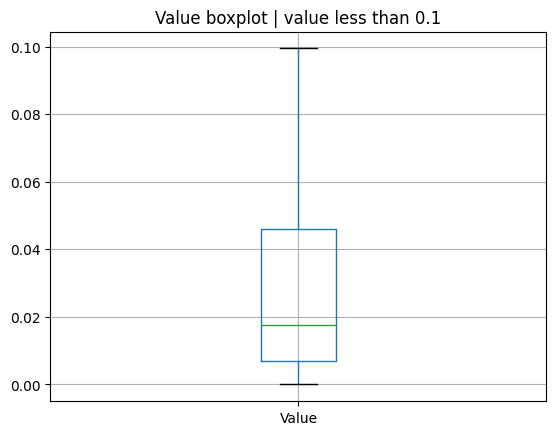

In [38]:
df3.boxplot(column = 'Value')
plt.title("Value boxplot | value less than 0.1")

# Show the plot
plt.show()

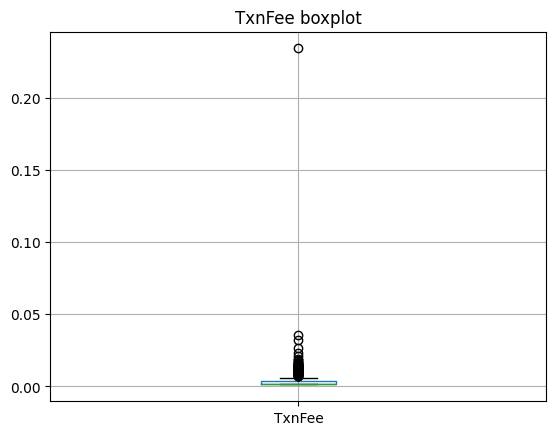

In [39]:

df_Value_without_zero.boxplot(column = 'TxnFee')
plt.title("TxnFee boxplot")

# Show the plot
plt.show()

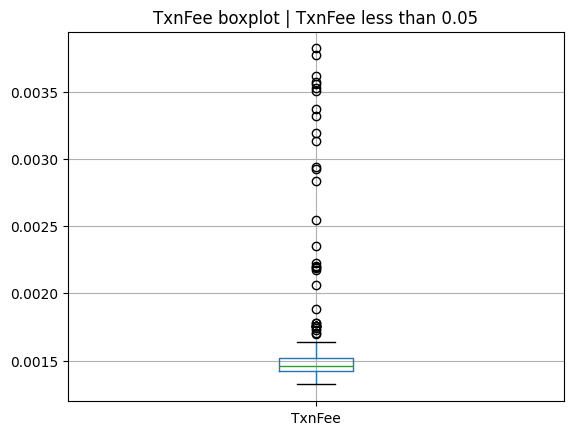

In [40]:
df_tnx_1 = df_Value_without_zero[df_Value_without_zero['TxnFee'] < 0.005]
df_tnx_1.boxplot(column = 'TxnFee')
plt.title("TxnFee boxplot | TxnFee less than 0.05")

# Show the plot
plt.show()

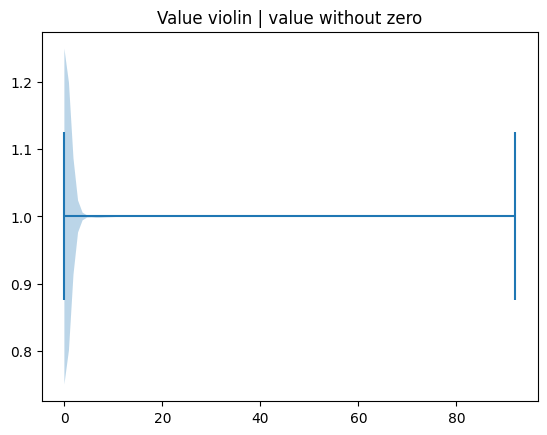

In [41]:
plt.violinplot(dataset=df_Value_without_zero['Value'], vert=False)
plt.title("Value violin | value without zero")

# Show the plot
plt.show()

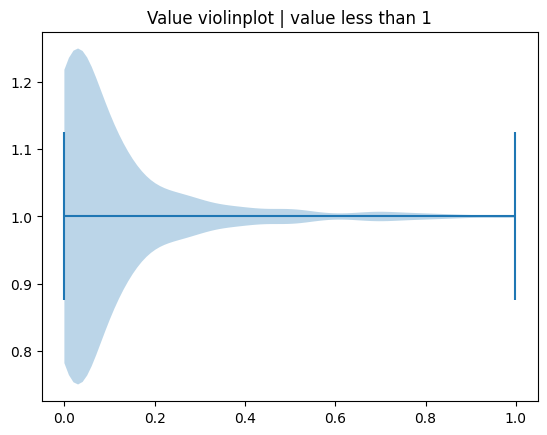

In [42]:
plt.violinplot(dataset=df2['Value'], vert=False)
plt.title("Value violinplot | value less than 1")

# Show the plot
plt.show()

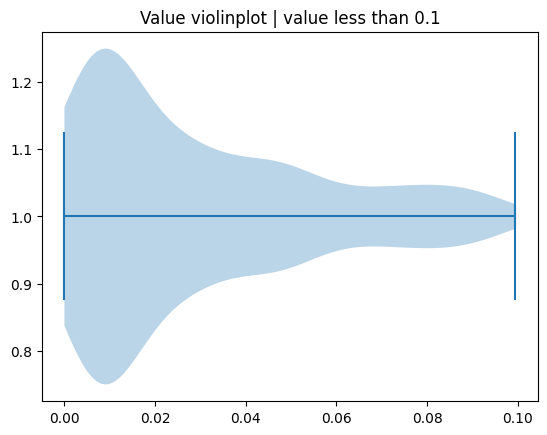

In [43]:
plt.violinplot(dataset=df3['Value'], vert=False)
plt.title("Value violinplot | value less than 0.1")

# Show the plot
plt.show()

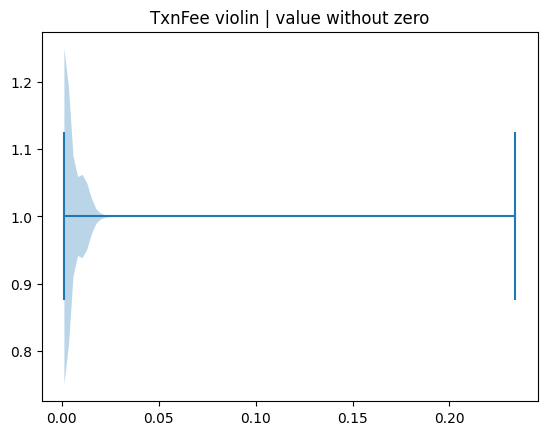

In [44]:
plt.violinplot(dataset=df_Value_without_zero['TxnFee'], vert=False)
plt.title("TxnFee violin | value without zero")

# Show the plot
plt.show()

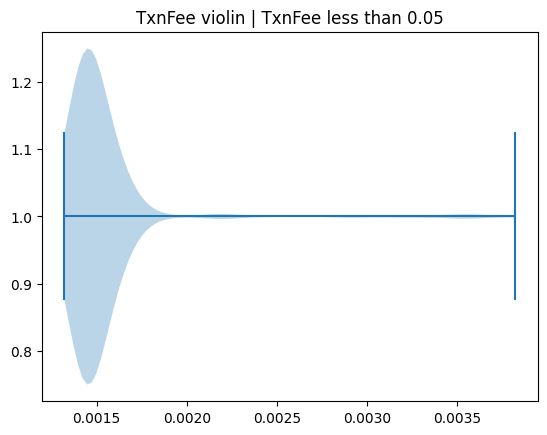

In [45]:
from matplotlib.pyplot import figure
plt.violinplot(dataset=df_tnx_1['TxnFee'], vert=False)
plt.title("TxnFee violin | TxnFee less than 0.05")
# Show the plot
plt.show()

- Analysis
  A lot of outliers are in main population but after checking values near zero we see distribution is more similar to normal distribution

  Outliers show some pepole has better status and are unique in these samples but typical transactions are similar to normal(without outliers)

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

# part3:

### SRS:

In [66]:
print(len(df_without_duplicates))

df = pd.DataFrame(df_without_duplicates)

# Now, let's apply Simple Random Sampling to select, for example, 20 samples from this DataFrame
sample_size = 20
df_sample = df.sample(n=sample_size)

print(len(df_sample))

1383
20


In [67]:
print("Mean for SRS Transaction value :  " ,df_sample['Value'].mean())

Mean for SRS Transaction value :   0.03687260835


In [68]:
print("Mean for SRS Transaction TxnFee :  " ,df_sample['TxnFee'].mean())

Mean for SRS Transaction TxnFee :   0.0040052164999999995


In [69]:
print("Standard deviation for SRS Transaction value :  " ,df_sample['Value'].std())

Standard deviation for SRS Transaction value :   0.09918703239948347


In [70]:
print("Standard deviation for SRS TxnFee :  " ,df_sample['TxnFee'].std())

Standard deviation for SRS TxnFee :   0.004944948884346823


<Axes: title={'center': 'Histogram of TxnFee'}, ylabel='Frequency'>

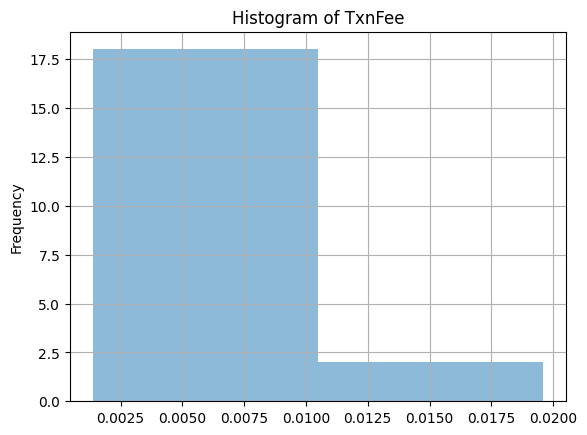

In [74]:
df_sample['TxnFee'].plot(kind='hist', bins=find_bin_size(df_sample['TxnFee']), density=False, alpha=0.5, label='Histogram of TxnFee', grid=True, 
                                    title = "Histogram of TxnFee")

<Axes: title={'center': 'Histogram of Value'}, ylabel='Frequency'>

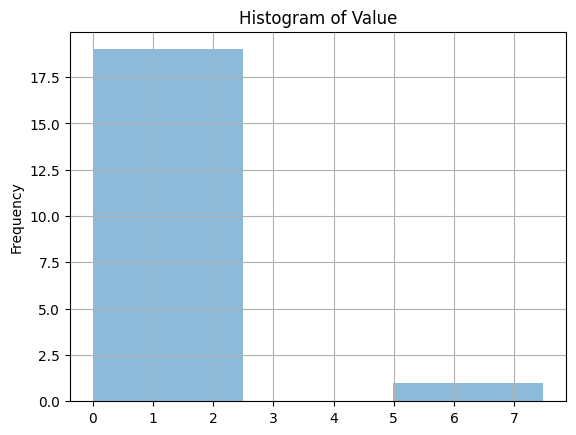

In [52]:
df_sample['Value'].plot(kind='hist', bins=find_bin_size(df_sample['Value']), density=False, alpha=0.5, label='Histogram of Value', grid=True, 
                                    title = "Histogram of Value")

# Stratified Sampling

In [60]:
percentiles = [0, 20, 40, 60, 80, 100]
bin_edges = np.percentile(df['TxnFee'], percentiles)

df['stratum'] = pd.cut(df['TxnFee'], bins=bin_edges, include_lowest=True, labels=False)

sample_size_per_stratum = 5 
stratified_sample = df.groupby('stratum', group_keys=False).apply(lambda x: x.sample(min(len(x), sample_size_per_stratum)))

C:\Users\User\AppData\Local\Temp\ipykernel_1988\3037683072.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('stratum', group_keys=False).apply(lambda x: x.sample(min(len(x), sample_size_per_stratum)))


In [61]:
print( "Mean of TxnFee" , stratified_sample['TxnFee'].mean())
print( "Std of TxnFee" , stratified_sample['TxnFee'].std())

Mean of TxnFee 0.0108863264
Std of TxnFee 0.03278894193898098


<Figure size 1000x600 with 0 Axes>

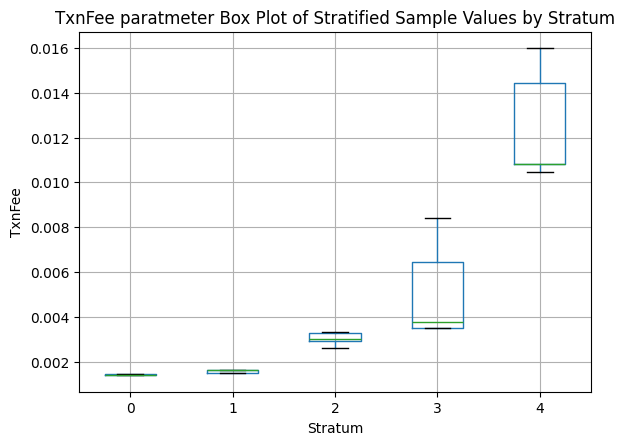

In [54]:
# Box Plot for Stratified Samples using matplotlib
plt.figure(figsize=(10, 6))
df['stratum'] = df['stratum'].astype('category')  # Ensuring 'stratum' is treated as a categorical variable
stratified_sample.boxplot(column='TxnFee', by='stratum')
plt.title('TxnFee paratmeter Box Plot of Stratified Sample Values by Stratum')
plt.suptitle('')  # Remove the default 'Title' subtitle to clean up the plot title
plt.xlabel('Stratum')
plt.ylabel('TxnFee')
plt.show()

<Axes: title={'center': 'Value of TxnFee'}, ylabel='Frequency'>

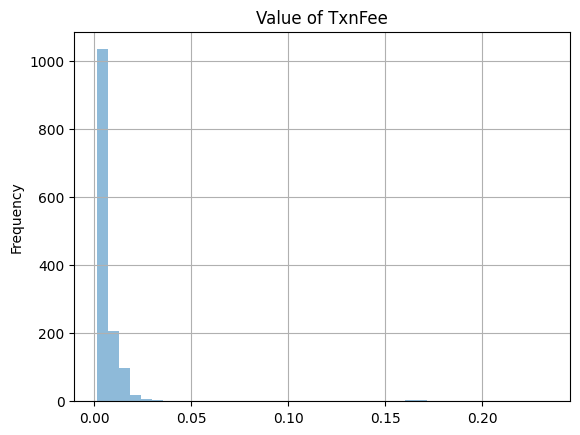

In [55]:
df['TxnFee'].plot(kind='hist', bins=(find_bin_size(df['TxnFee'])), density=False, alpha=0.5, label='Histogram of TxnFee', grid=True, 
                                    title = "Value of TxnFee")

In [62]:
bin_edges = np.percentile(df['Value'], percentiles)

df['stratum'] = pd.cut(df['Value'], bins=bin_edges, include_lowest=True, labels=False, duplicates = 'drop')

sample_size_per_stratum = 5 
stratified_sample = df.groupby('stratum', group_keys=False).apply(lambda x: x.sample(min(len(x), sample_size_per_stratum)))

C:\Users\User\AppData\Local\Temp\ipykernel_1988\1054599544.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('stratum', group_keys=False).apply(lambda x: x.sample(min(len(x), sample_size_per_stratum)))


In [63]:
print( "Mean of Value" , stratified_sample['Value'].mean())
print( "Std of Value" , stratified_sample['Value'].std())

Mean of Value 0.17969287599999997
Std of Value 0.2768010341056815


<Figure size 1000x600 with 0 Axes>

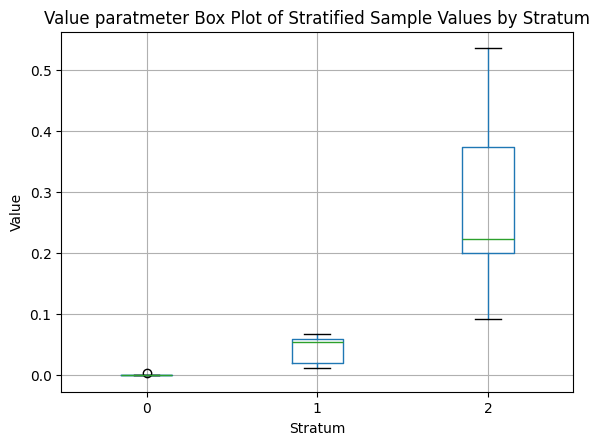

In [57]:
plt.figure(figsize=(10, 6))
df['stratum'] = df['stratum'].astype('category')  # Ensuring 'stratum' is treated as a categorical variable
stratified_sample.boxplot(column='Value', by='stratum')
plt.title('Value paratmeter Box Plot of Stratified Sample Values by Stratum')
plt.suptitle('')  # Remove the default 'Title' subtitle to clean up the plot title
plt.xlabel('Stratum')
plt.ylabel('Value')
plt.show()

<Axes: title={'center': 'Value of Value'}, ylabel='Frequency'>

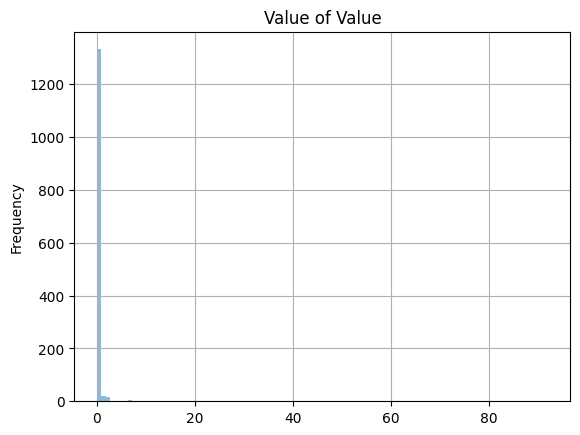

In [58]:
df['Value'].plot(kind='hist', bins=(find_bin_size(df['Value'])), density=False, alpha=0.5, label='Histogram of Value', grid=True, 
                                    title = "Value of Value")

- Analysis
For comparing Transaction value and TxnFee, both hase skew to the right but in for Transaction Value is higher.
In all states , population and samples.

- Compare two sampling methods

SRS:
1. Simplicity and ease of implementation.
2. Generalizations about the entire population without bias.

Strarified:
1. Greater precision: Stratified samples can provide more accurate estimates than SRS of the same size.
2. Cost savings: Often requires a smaller sample size.
3. Guards against unrepresentative samples.

- Compare samples and populations

- By comparing plots and mean and std for both of  population and samples, we see stratified is better than SRS because it's values are near to real population's values and is bt=etter extimation.

- In stratified sample we can see better visualization for our data because it collect from diffrent parts of data.

- Is possible SRS that shows not enough information and lead us astrary.

# Questions

## Q1. What are some potential limitations when using web scraping for data collection?Specifically, what problems did you face while fetching data from Etherscan? What problems can these limitations cause in your analysis?
Some potential limitations of using web scraping for data collection include:

1. **Website Structure Changes**: Websites frequently update their structure, which can break the web scraping code that's built based on the previous structure.

2. **Rate Limiting and IP Blocking**: Websites may have restrictions in place to prevent automated scraping, such as rate limits or IP blocking, which can hinder the scraping process.

3. **Data Quality Issues**: Data extracted through web scraping may contain errors, missing values, or inconsistencies due to the scraping process.

4. **Legal Issues**: Web scraping may violate a website's terms of service or copyright laws if done without permission, leading to potential legal consequences.

5. **Complex Data Retrieval**: Some websites may require navigating through multiple pages or forms before reaching the desired data, complicating the scraping process.

6. **Dynamic Content**: Websites that heavily rely on JavaScript for content loading may present a challenge for simple scraping methods as the content may not be readily available in the initial page source.

When fetching data from Etherscan specifically, some challenges you may face include:

1. **API Limitations**: Etherscan may have limits on the number of API requests that can be made within a given time frame, affecting the amount of data you can fetch.

2. **Authentication Requirements**: Some data on Etherscan may require authentication or authorization to access, which can complicate the scraping process.

3. **Data Formatting**: The data fetched from Etherscan may not be in a structured format, requiring additional processing to make it usable for analysis.

4. **Rate Limiting**: Etherscan has rate limits on the number of requests that can be made in a certain time period, leading to potential blocks or delays in data retrieval.

These limitations can lead to several issues in data analysis, such as:

1. **Incomplete Data**: Failure to retrieve all necessary data due to limitations or errors in scraping can result in incomplete datasets, impacting the reliability of analysis and conclusions drawn from it.

2. **Data Integrity**: Changes in the structure or content of scraped data can introduce inconsistencies or errors that may not be immediately apparent, leading to erroneous analysis results.

3. **Compliance Concerns**: Some websites have terms of service that prohibit or restrict scraping activities, raising legal and ethical concerns if data is collected without proper authorization.


These limitations can cause problems in your analysis by potentially introducing errors or biases in the data, leading to inaccurate conclusions. It's important to be aware of these limitations and take steps to mitigate them, such as monitoring for changes in website structure, respecting rate limits, and ensuring data quality checks are in place.

## Q2.What can make your analysis untrustworthy? What are your solutions?
Several factors can make an analysis untrustworthy, including:

1. **Data Quality Issues**: Inaccurate, incomplete, or inconsistent data can lead to unreliable results.

2. **Biases in Data Collection**: If the data collected is not representative or is skewed in some way, the analysis may not be reliable.

3. **Incorrect Analysis Methods**: Using inappropriate analytical techniques or misinterpreting results can lead to faulty conclusions.

4. **Overlooking Variables**: Failing to consider all relevant factors or variables in the analysis can result in incomplete or misleading findings.

5. **Biased Data Selection**: If the data used for analysis is not representative or is selectively biased, the conclusions drawn may not accurately reflect the true picture.

6. **Unsound Methodology**: Using flawed or inappropriate analytical methods can produce unreliable results, casting doubt on the validity of the analysis.

7. **Overfitting**: Fitting a model too closely to the training data can lead to overfitting, where the model performs well on the training data but poorly on new data, reducing its reliability.

To ensure the trustworthiness of your analysis, consider the following solutions:

1. **Ensure Data Quality**: Clean and preprocess data properly, check for outliers, missing values, and inconsistencies, and verify the accuracy of the data.

2. **Use Reliable Sources**: Gather data from reputable and trustworthy sources to minimize the risk of biased or unreliable data.

3. **Transparent Methodology**: Clearly document and explain the analytical methods used, including any assumptions and limitations. This transparency allows others to validate the analysis.

4. **Validate Results**: Conduct sensitivity analyses or robustness checks to verify the robustness of the results and assess the impact of different assumptions.

5. **Peer Review**: Have your analysis reviewed by peers or subject matter experts to gain feedback, identify potential flaws, and improve the quality of the analysis.

6. **Sensitivity Analysis**: Conduct sensitivity analysis to assess the impact of variations or uncertainties in the data on the results, providing insights into the robustness of the analysis.

7. **Cross-Validation**: Use cross-validation techniques to evaluate model performance on unseen data and prevent overfitting, enhancing the generalizability of results.




##  Q3.How did the visualization help you in understanding the data? What could you interpret from the plots?
Visualization plays a crucial role in understanding and interpreting data by providing a visual representation of the information. Here are some/ ways in which visualization helped in understanding the data and the potential interpretations from the plots:

1. **Identifying Patterns and Trends**: Visualizations such as line graphs or scatter plots can help identify patterns, trends, and relationships within the data that may not be apparent from looking at raw numbers.

2. **Comparing Data**: Bar charts, pie charts, or histograms can be used to compare different categories or variables, allowing for easier interpretation of differences or similarities.

3. **Detecting Outliers**: Box plots or scatter plots can help identify outliers or anomalies in the data, providing insights into data quality or potential errors.

4. **Understanding Distribution**: Histograms or density plots can help visualize the distribution of data, such as whether it is normally distributed or skewed, aiding in statistical analysis.

5. **Correlation Analysis**: Scatter plots or correlation matrices can help visualize the relationship between variables, showing if there is a positive, negative, or no correlation between them.

6. **Geospatial Insights**: Maps and geospatial visualizations help understand geographic patterns in data, such as regional differences or concentrations.

Interpretations from specific types of plots:

- **Line Plots**: These can show trends over time or relationships between variables. Steep inclines or declines indicate significant changes.

- **Bar Charts**: Useful for comparing categories. Differences in bar lengths indicate variations in quantities.

- **Pie Charts**: Show the proportion of different categories in a whole. Larger slices represent more significant portions.

- **Scatter Plots**: Help visualize relationships between two variables. Clustering of points or linear patterns can indicate correlations.

- **Heatmaps**: Display variations in data using color gradients. Hotspots indicate areas of high values while cooler areas represent lower values.

By interpreting the plots generated from the visualization of data, one can draw meaningful insights, make informed decisions, and communicate findings effectively. Visualizations can simplify complex data sets and convey information in a clear and intuitive manner, helping to uncover insights and trends that might not be obvious from looking at the raw data alone.

In essence, visualizations aid in gaining insights, facilitating data exploration, and presenting findings effectively. They enhance the understanding of complex datasets and make it easier to communicate insights to stakeholders or decision-makers


## Q4. How do the two sampling methods differ in their output? Compare these and explain which one is a better fit to the population
The two main sampling methods are random sampling and stratified sampling. Here's how they differ in their output and which one may be a better fit for the population:

1. **Simple Random Sampling**:
   - **Output**: In random sampling, each member of the population has an equal chance of being selected. The sample is chosen entirely by chance, and every individual has the same probability of being included in the sample.
   - **Advantages**: Random sampling is straightforward to implement and eliminates bias in the selection process. It is suitable when the population is homogeneous and there are no distinct subgroups.
       - It is a simple and straightforward method that does not require prior knowledge of the population's characteristics.
       - The sample obtained through random sampling is more likely to be representative of the population as a whole.
       - It is suitable when the population is homogenous, and there are no distinct subgroups to consider.
    - **Disadvantages**: There is a risk of sampling error, as random sampling may not adequately represent specific subgroups within the population.

2. **Stratified Sampling**:
   - **Output**: In stratified sampling, the population is divided into homogeneous subgroups (or strata) based on certain characteristics. Samples are then randomly selected from each stratum proportionally to their size in the population.
   - **Advantages**: Stratified sampling ensures that each subgroup is represented in the sample, making it more reliable for analyzing specific characteristics within the population. It can provide more precise estimates for subgroups.
       - Proportional or disproportionate samples are then taken from each stratum based on their representation in the population.
       - It ensures that each subgroup of the population is adequately represented in the sample, making it suitable for heterogeneous populations with distinct subgroups.
   - **Disadvantages**: It requires knowledge of the population characteristics to create strata, which might not always be available. It is more complex and time-consuming compared to simple random sampling.
   
**Comparison**:
- Random sampling is ideal when the population is relatively homogenous and there are no subgroups that require specific representation in the sample.
- Stratified sampling is preferred when the population is diverse, and it is important to ensure that each subgroup is represented in the sample proportionally to its presence in the population.

**Which is a Better Fit?**:
The choice between random sampling and stratified sampling depends on the research objectives, the homogeneity of the population, and the availability of information about the population. If the population is relatively homogeneous and there are no distinct subgroups, random sampling may suffice. However, if there are known subgroups with varying characteristics, stratified sampling would be a better fit as it ensures that these subgroups are adequately represented in the sample.

In general, stratified sampling is often preferred when the population exhibits significant variability across different characteristics or when researchers are interested in understanding specific subgroups within the population, making it a better fit for such scenarios.



